# 制約付き最適化のアルゴリズムの適用例

In [2]:
# 必要なライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib 
from scipy import optimize
import cvxpy  as cp

## 外点ペナルティ
例題3.3に等式制約を１本追加

$$
\begin{array}{|ll}
\text{目的関数} &f(x_1,x_2) = (x_1-2)^2+(x_2-4)^2\quad\to\text{最小化}\\
\text{制約条件} &g_1(x_1,x_2)  = -x_1+x_2\le 0,\\
&g_1(x_1,x_2)  = (x_1-1)^3+x_2-3\le 0,\\
&g_1(x_1,x_2)  =  (x_1-1)^2-x_1\le 0,\\
& h_1(x_1,x_2) = x_1+x_2 - 2.
\end{array}
$$

iter =  1 , f(x) =  4.444444538279561 , P(x) =  2.222222128387106 , 
 g(x) =  [ 0.66666667 -0.96296299 -1.55555551] , h(x) =  [1.3333333] , x =  [1.33333331 1.99999998]
iter =  2 , f(x) =  8.26446286383385 , P(x) =  0.16528924541505954 , 
 g(x) =  [ 0.18181827 -1.7265214  -0.44628088] , h(x) =  [0.36363631] , x =  [1.09090902 1.27272729]
iter =  3 , f(x) =  9.611687866543493 , P(x) =  0.007689348083358427 , 
 g(x) =  [ 0.03921569 -1.94116894 -0.09765473] , h(x) =  [0.07843136] , x =  [1.01960784 1.05882352]
iter =  4 , f(x) =  9.920477512919938 , P(x) =  0.00031745479703912253 , 
 g(x) =  [ 0.00796813 -1.98804775 -0.01990442] , h(x) =  [0.01593624] , x =  [1.00398406 1.01195218]
iter =  5 , f(x) =  9.984019239248916 , P(x) =  1.2779449016508116e-05 , 
 g(x) =  [ 1.59872095e-03 -1.99760193e+00 -3.99614127e-03] , h(x) =  [0.00319743] , x =  [1.00079935 1.00239807]
iter =  6 , f(x) =  9.996800827469833 , P(x) =  5.118171167702266e-07 , 
 g(x) =  [ 3.19948796e-04 -1.99952008e+00 -7.9982408

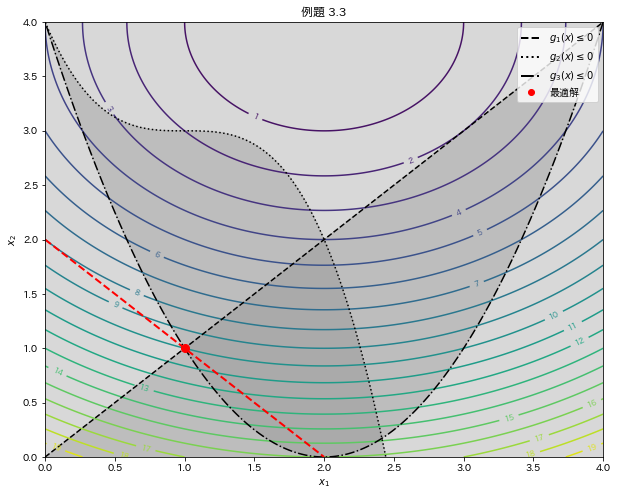

In [ ]:
# 目的関数
def f_obj(x):# f(x) 
    return (x[0] - 2)**2 + (x[1] - 4)**2
# 制約条件
def g_ineq(x): # g(x) = [g1(x), g2(x), g3(x)]<= 0
    g1 = -x[0] + x[1]  # g1(x) <= 0
    g2 = (x[0] - 1)**3 + x[1] - 3  # g2(x) <= 0
    g3 = (x[0] - 2)**2 - x[1]  # g3(x) <= 0
    return np.array([g1, g2, g3])
def h_eq(x):# h(x) = [h1(x)] =  0
    h1 = x[0] + x[1] - 2
    return np.array([h1])
    
# グリッドの作成
x1 = np.linspace(0, 4, 500)
x2 = np.linspace(0, 4, 500)
x1_grid, x2_grid = np.meshgrid(x1, x2)

# 目的関数の値
f_values = f_obj([x1_grid, x2_grid])

# 制約条件の値
g_values = [g_ineq([x1_grid, x2_grid])[i] for i in range(3)]
h_values = h_eq([x1_grid, x2_grid])[0]

# プロット
plt.figure(figsize=(10, 8))

# 等高線プロット（目的関数）
contours = plt.contour(x1_grid, x2_grid, f_values, levels=20, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# 制約条件の領域
linestyles = ["dashed", "dotted", "dashdot"]
labels = ["$g_1(x) \leq 0$", "$g_2(x) \leq 0$", "$g_3(x) \leq 0$"]
handles = []
for i, g_val in enumerate(g_values):
    plt.contourf(x1_grid, x2_grid, g_val, levels=[-np.inf, 0], colors="gray", alpha=0.3)
    plt.contour(x1_grid, x2_grid, g_val, levels=[0], colors="black", linestyles=linestyles[i])
    handles.append(plt.Line2D([0], [0], color="black", linestyle=linestyles[i], lw=2, label=labels[i]))
plt.contour(x1_grid, x2_grid, h_values, levels=[0], colors="red", linestyles="dashed", linewidths=2)

# 外点ペナルティ関数法で最適化
from code7_1 import * # 外点ペナルティ関数法(アルゴリズム7.2) のコードを読み込み
x_0 = np.array([0, 0]) #初期点
x_opt = Exter_penalty_method(f_obj,g_ineq, h_eq, x_0) #外点ペナルティ法を実行

# 最適解のマーカー
plt.plot(x_opt[0],x_opt[1], 'ro', markersize=8, label="最適解")

# 軸ラベルとタイトル
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("例題 3.3")
plt.legend(handles=handles + [plt.Line2D([0], [0], color="red", marker="o", lw=0, label="最適解")], loc="upper right")

# グラフの表示
plt.show()


# 拡張ラグランジュ法
$$
\begin{array}{|ll}
\text{目的関数}&f(x_1,x_2) = (x_1-1)^2+10(x_1^2-x_2)^2\quad\to\text{最小化}\\
\text{制約条件} 
& h_1(x_1,x_2) = x_1+x_2 +1.
\end{array}
$$


iter =  1 , f(x) =  0.10274730618084715 , P(x) =  0.01805387499833821 , 
 h(x) =  [0.13436471] , x =  [0.6822864 0.4520783] , mu =  [0]
iter =  2 , f(x) =  0.13686155359876997 , P(x) =  0.00035665985829497475 , 
 h(x) =  [0.01888544] , x =  [0.63359887 0.38528657] , mu =  [0.13436471]
iter =  3 , f(x) =  0.14237167159993844 , P(x) =  4.23966591740387e-06 , 
 h(x) =  [0.00205904] , x =  [0.62634199 0.37571706] , mu =  [0.22879191]
iter =  4 , f(x) =  0.14298606184012874 , P(x) =  4.396824908234736e-08 , 
 h(x) =  [0.00020969] , x =  [0.62554176 0.37466792] , mu =  [0.28026803]
iter =  5 , f(x) =  0.14304883192953152 , P(x) =  4.426797307151258e-10 , 
 h(x) =  [2.10399556e-05] , x =  [0.62546011 0.37456093] , mu =  [0.30647879]


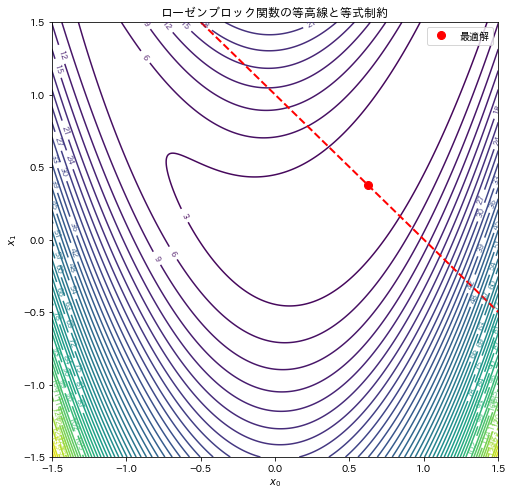

In [6]:
# 目的関数
def func_rosen(x):
    return (x[0] - 1)**2 + 10 * (x[0]**2 - x[1])**2
# 等式制約
def h_eq(x):
    return np.array([x[0] + x[1] - 1])

# 拡張ラグランジュ法で最適化
from code7_2 import * # 拡張ラグランジュ法(アルゴリズム7.3) のコードを読み込み
x_0 = np.array([0, 0])
mu_0 =  np.array([0])
x_opt = ALagrangian_method(func_rosen, h_eq, x_0, mu_0)

# グリッド作成
x0_vals = np.linspace(-1.5, 1.5, 500)
x1_vals = np.linspace(-1.5, 1.5, 500)
x0_grid, x1_grid = np.meshgrid(x0_vals, x1_vals)

# 目的関数の値
f_values = func_rosen([x0_grid, x1_grid])

# 等式制約の値
h_values = h_eq([x0_grid, x1_grid])[0]
# プロット
plt.figure(figsize=(8, 8))
# 等高線プロット（目的関数）
contours = plt.contour(x0_grid, x1_grid, f_values, levels=50, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)
# 等式制約の線
plt.contour(x0_grid, x1_grid, h_values, levels=[0], colors="red", linestyles="dashed", linewidths=2)
# 最適解のプロット
plt.plot(x_opt[0], x_opt[1], 'ro', markersize=8, label="最適解")
# 軸ラベルとタイトル
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.title("ローゼンブロック関数の等高線と等式制約")
# 凡例
plt.legend(loc="upper right")
# グラフの表示
plt.show()